In [1]:
import numpy as np
import pandas as pd #For reading dataset from csv 
import matplotlib.pyplot as plt #For plotting and visualization
import time

In [2]:
dataset = pd.read_csv("data.csv",names=["X","Y",])

trnData = dataset.as_matrix()

m_examples = trnData.shape[0]

dataset.head()


C:\Users\KetanPandey\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


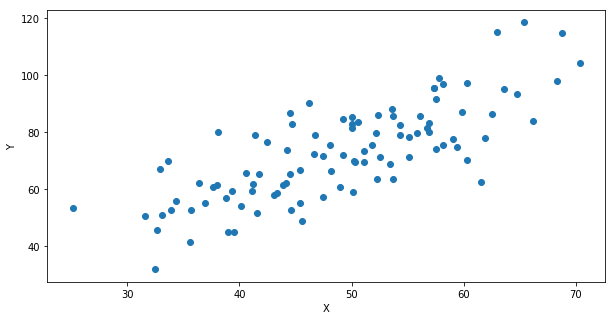

In [3]:
plt.figure(figsize=(10,5))
plt.scatter(x=trnData[:,0],y=trnData[:,1])
plt.ylabel("Y")
plt.xlabel("X")
plt.show()

In [4]:
def CostFunction(m,b,data):
    
    sumError = 0
    
    for itr in range(m_examples):
        
        feature = data[itr,0]
        label = data[itr,1]
        
        predLabel = (m * feature) + b
        
        sumError += (label - predLabel)**2
    
    sumError = sumError/m_examples
        
    return sumError

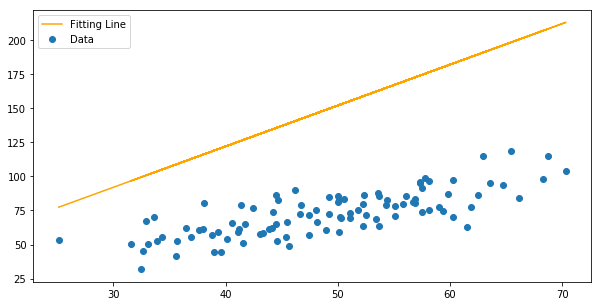

In [5]:
def PlotFitLine(m,b,data):
    
    fig = plt.figure(figsize=(10,5))
    axes = fig.add_subplot(111)
    axes.scatter(x=data[:,0],y=data[:,1], label='Data')
    plt.plot(data[:,0], m*data[:,0] + b, color='orange', label='Fitting Line')
    axes.legend(loc='upper left')
    plt.show()

PlotFitLine(3,2,trnData)

In [6]:
def gradient_descent(m,b,data):
    learning_rate = 0.0001
    m_gradient = 0
    b_gradient = 0
    N = m_examples
    
    for itr in range(N):    
        x = data[itr,0]
        y = data[itr,1]
         
        b_gradient += - ((y - (m*x + b)))
        m_gradient += - (x * (y - (m*x + b)))

    new_m = m - (learning_rate * (m_gradient*(2.0/N)))
    new_b = b - (learning_rate * (b_gradient*(2.0/N)))
    
    return new_m,new_b
    

In [7]:
def RunGradientDescent(m,b,data,steps):
    
    fig,ax = plt.subplots(1,1,figsize=(10,7))
    error_list = list()
    
    error = CostFunction(m,b,data)
    error_list.append(error)
    
    for i in range(steps):
        step = i
        error_plot(fig,ax,error_list,error,data,step)
        
        m,b = gradient_descent(m,b,data)
        error = CostFunction(m,b,data)
        error_list.append(error)
        
        time.sleep(10/steps)
        plt.cla()
        print('At step %d - Line: y = %.2fx + %.2f - Error: %.2f' %(i+2,m,b,error))

    error_plot(fig,ax,error_list,error,data,step)
    
    print('\nBest  line: y = %.6fx + %.6f - Error: %.6f' %(m,b,error))
    
    PlotFitLine(m,b,data)

In [8]:
def error_plot(fig,axes,error_list,error,data,step):
    
    axes.cla()
    
    axes.set_title('Error (step %d)' % step)
    axes.set_xlabel('Iteration number')
    axes.set_ylabel('Error')
    
    axes.plot(np.arange(0,len(error_list)),error_list)    
    fig.canvas.draw()

At step 1 - Line: y = 5.00x + 8.00 - Error: 33802.53
At step 2 - Line: y = 3.17x + 7.96 - Error: 8587.84
At step 3 - Line: y = 2.25x + 7.95 - Error: 2243.37
At step 4 - Line: y = 1.79x + 7.94 - Error: 646.99
At step 5 - Line: y = 1.56x + 7.93 - Error: 245.31
At step 6 - Line: y = 1.44x + 7.93 - Error: 144.24
At step 7 - Line: y = 1.38x + 7.93 - Error: 118.81
At step 8 - Line: y = 1.35x + 7.93 - Error: 112.41
At step 9 - Line: y = 1.34x + 7.93 - Error: 110.80
At step 10 - Line: y = 1.33x + 7.93 - Error: 110.39
At step 11 - Line: y = 1.33x + 7.93 - Error: 110.29

Best  line: y = 1.327382x + 7.927821 - Error: 110.291807


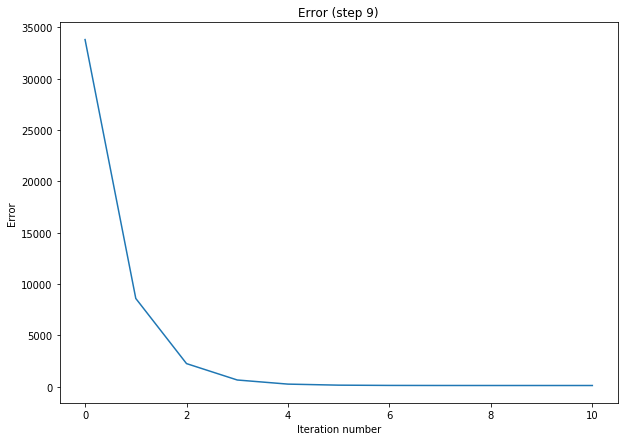

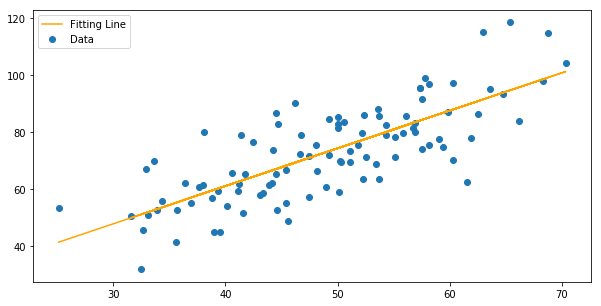

In [9]:
m = 5
b = 8
steps = 10
print('At step %d - Line: y = %.2fx + %.2f - Error: %.2f' %(1,m,b,CostFunction(m,b,trnData)))
RunGradientDescent(m,b,trnData,steps)